In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from os import listdir,rename

In [ ]:
#Do not run!
"""
#file_list = set(listdir("C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/paul"))
db = pd.read_csv("C:/Users/paul8/Downloads/DB.csv",sep=";")
#file_list_db = set(db.File)
#len(file_list.intersection(file_list_db))
def make_date(s):
    s = str(s)
    if len(s) == 5:
        s = "0" + s
    return s[:2] + "/" + s[2:4] + "/20" + s[4:]
db["Invoice Date"] = db["Invoice Date"].map(make_date)
db["Amount"] = db["Amount"].map(lambda x:x.replace(",","."))
db["Invoice Number"] = db["Invoice Number"].map(str)
#db.to_csv("C:/Users/paul8/Downloads/DB.csv",sep=";",index=False)
"""    

In [88]:
db = pd.read_csv("C:/Users/paul8/Downloads/DB_update.csv",sep=";")
db["Amount"] = db["Amount"].map(str)
db["Invoice Number"] = db["Invoice Number"].map(str)
db.head()

,File,Vendor,Invoice Number,Amount,Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
1,ALU_RAHMEN_Rechnung_27112023.pdf,Alurahmen24,1164/11/2023,23.7,11/27/2023
2,Amazon_GaN_Charger_13102022.pdf,Amazon Services Europe S.à r.l.,DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
4,Aral_Center_Hildesheim_05032020.pdf,Aral Center Hildesheim,4605/009/00003,68.84,03/05/2020


In [3]:
data = pd.DataFrame(columns=["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"])
folder = "./Results/"
files = listdir(folder)
print(len(files))
for file in files:
    #print(file)
    path = folder + file
    data_new = pd.read_csv(path, sep=';', header=None)
    data_new.columns = ["File","Extracted Vendor","Extracted Invoice Number","Extracted Amount","Extracted Invoice Date"]
    #print(data_new.dtypes)
    data = data._append(data_new,ignore_index=True)
data.head()

160


,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020 00:00:00
1,ALU_RAHMEN_Rechnung_27112023.pdf,NaN,1164/11/2023,23.70,11/27/2023 00:00:00
2,Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022 00:00:00
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022 00:00:00
4,Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,,68.84,03/05/2020 00:00:00


In [4]:
data["Extracted Invoice Date"] = data["Extracted Invoice Date"].map(lambda x:x.split(" ")[0],na_action="ignore")
data["Extracted Invoice Number"] = data["Extracted Invoice Number"].map(lambda x: "nan" if str(x) == "" else str(x).strip()).map(lambda x: "nan" if str(x) == "" else str(x).strip())
data["Extracted Amount"] = data["Extracted Amount"].map(str)
data["Extracted Vendor"] = data["Extracted Vendor"].map(str)

data.head()


,File,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date
0,AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
1,ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,11/27/2023
2,Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
3,Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
4,Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,nan,68.84,03/05/2020


In [89]:
results = data.set_index("File").join(db.set_index("File"),how="inner")
results

,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date,Vendor,Invoice Number,Amount,Invoice Date
File,,,,,,,,
AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020
ALU_RAHMEN_Rechnung_27112023.pdf,nan,1164/11/2023,23.7,11/27/2023,Alurahmen24,1164/11/2023,23.7,11/27/2023
Amazon_GaN_Charger_13102022.pdf,"Amazon Services Europe S.à r.l.,",DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022,Amazon Services Europe S.à r.l.,DS-ASE-INV-DE-2022-320325323,47.99,10/13/2022
Amazon_USB_Flash_Drive_24102022.pdf,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022,Amazon EU S.à r.l.,DE261LJS0AEUI,20.39,10/24/2022
Aral_Center_Hildesheim_05032020.pdf,Aral- CENTER,nan,68.84,03/05/2020,Aral Center Hildesheim,4605/009/00003,68.84,03/05/2020
...,...,...,...,...,...,...,...,...
Zollamt_Schaffhausen_Vignette_20022020.pdf,Scnwerzensche Fidgenossenschett Schweiz Confed...,nan,40.0,02/20/2020,Schweizerische Eidgenossenschaft,07937/80831371,40.0,02/20/2020
Zollamt_St_Margarethen_Vignette_CH_2023_14072023.pdf,Schweizerische Eidgenossenschaft,nan,40.0,07/14/2023,Schweizerische Eidgenossenschaft,nan,40.0,07/14/2023
Zoll_Schaffhausen_Vignette_2024.pdf,Schweizerische Eldgenossenschaft Conféderation,nan,nan,03/19/2024,Schweizerische Eidgenossenschaft,nan,40.0,03/19/2024


In [90]:
results["Correct Vendor"] = results["Extracted Vendor"] == results["Vendor"] 
for file,ext_ven,ven in zip(results.index, results["Extracted Vendor"], results["Vendor"]):
    results.loc[file,"Correct Vendor"] = ext_ven in ven or ven in ext_ven
results["Correct Invoice Number"] = results["Extracted Invoice Number"] == results["Invoice Number"]
results["Correct Amount"] = results["Extracted Amount"] == results["Amount"]
results["Correct Invoice Date"] = results["Extracted Invoice Date"] == results["Invoice Date"]
results["Quota"] = results["Correct Vendor"].map(int) + results["Correct Invoice Number"].map(int) + results["Correct Amount"].map(int) + results["Correct Invoice Date"].map(int)


In [9]:
results.sort_values("Quota",ascending=False)

,Extracted Vendor,Extracted Invoice Number,Extracted Amount,Extracted Invoice Date,Vendor,Invoice Number,Amount,Invoice Date,Correct Vendor,Correct Invoice Number,Correct Amount,Correct Invoice Date,Quota
File,,,,,,,,,,,,,
AH_Siedle_Reifenwechsel_24042020.pdf,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020,Autohaus Siedle GmbH & Co. KG,110024940,79.85,04/24/2020,True,True,True,True,4
Vodafone_Office_LP_Light_05082020.pdf,Vodafone Business-Service,00107435460/20/08,44.46,08/05/2020,Vodafone,00107435460/20/08,44.46,08/05/2020,True,True,True,True,4
R2_13112023_Rechnung 2023111804019.pdf,r2 Handels GmbH r2 Handels GmbH,2023111804019,30.2,11/13/2023,r2 Handels GmbH,2023111804019,30.2,11/13/2023,True,True,True,True,4
eu_bay_Rechnung RG3621053.pdf,eu-bay Commerce GmbH,RG3621053,11.99,11/23/2023,eu-bay,RG3621053,11.99,11/23/2023,True,True,True,True,4
R2_Rechnung 2024031929525_06032024.pdf,r2 Handels GmbH r2 Handels GmbH,2024031929525,133.4,03/06/2024,r2 Handels GmbH,2024031929525,133.4,03/06/2024,True,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zollamt_Schaffhausen_Bargen_Vignette_Schweiz_2021_02062021.pdf,Eidgenössische Zollverwaltung EZV,nan,40.0,06/02/2021,Schweizerische Eidgenossenschaft,20732/80733551,38.54,06/02/2021,False,False,False,True,1
Hotel_Christl_Rohrdorf_A8_11092020.pdf,Hotel Christe,43375,58.0,03/11/2020,Hotel Christl,43375,54.0,09/11/2020,False,True,False,False,1
Maut_Karawankentunnel_09092020.pdf,AISIFIiNIAIG,nan,7.5,NaN,ASFINAG,070543,7.5,09/09/2020,False,False,True,False,1


In [36]:
results.Quota.describe()

count    160.000000
mean       3.131250
std        0.862364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Quota, dtype: float64

(array([ 5.,  0., 23.,  0., 60.,  0., 72.]),
 array([0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25]),
 <BarContainer object of 7 artists>)

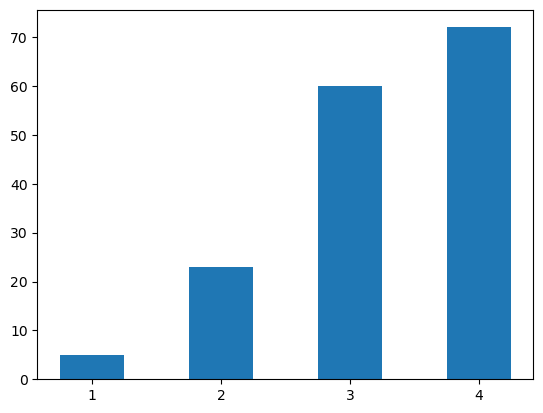

In [91]:
plt.xticks(range(1,5))
plt.hist(results.Quota,bins=[0.75+0.5*i for i in range(8)])
#plt.hist([1,2,3,4,1,3,1,1,2,4,3,4,2,4,2,1,4],bins=[0.75+0.5*i for i in range(8)])

In [92]:
n = len(results.index)
vendor_acc = (results["Correct Vendor"].sum() / n) * 100
number_acc = (results["Correct Invoice Number"].sum() / n) * 100
amount_acc = (results["Correct Amount"].sum() / n) * 100
date_acc = (results["Correct Invoice Date"].sum() / n) * 100
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")

Vendor Accuracy: 80.625 %
Invoice Number Accuracy: 70.625 %
Amount Accuracy: 86.25 %
Invoice Date Accuracy: 86.875 %


In [96]:
inv = results.loc[results["Correct Amount"] == False,["Extracted Amount","Amount"]]
inv

,Extracted Amount,Amount
File,,
Avanti_Tankomat_Rum_14022020.pdf,47.1,56.52
B-discount_Rechnung_55023640.pdf,nan,110.56
B24_GX_EAGLE_SCHALTWERK_KETTE_Rechnung 55449480_18092023.pdf,nan,213.92
B24_Rechnung 50046676.pdf,nan,340.53
B24_Rechnung 51105283.pdf,nan,230.46
B24_Rechnung 57005588 12072024.pdf,nan,154.95
B24_Rechnung_09012024_55973072.pdf,nan,450.93
BIKER_BOARDER_Maloja_1612695.pdf,nan,295.7
CHECK24 - Rechnung_U2019-4655382-1_1_HP_Monitor.pdf,268.07,319.0


In [97]:
scan = pd.read_csv("C:/Users/paul8/Downloads/DB_scan.csv",sep=';').set_index("File")

res_pdf = results.loc[scan["Scan"] == False,:]
res_scan = results.loc[scan["Scan"] == True,:]

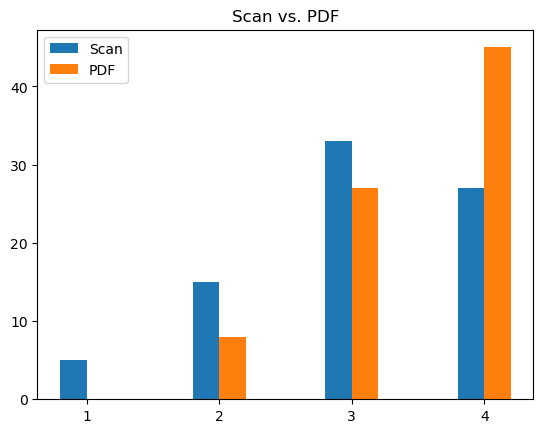

In [98]:
plt.title("Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([res_scan.Quota,res_pdf.Quota],bins=[0.75+0.5*i for i in range(8)])
plt.legend(["Scan","PDF"])
plt.show()

In [99]:
n = res_pdf.shape[0]
vendor_acc = (res_pdf["Correct Vendor"].sum() / n) * 100
number_acc = (res_pdf["Correct Invoice Number"].sum() / n) * 100
amount_acc = (res_pdf["Correct Amount"].sum() / n) * 100
date_acc = (res_pdf["Correct Invoice Date"].sum() / n) * 100
print("PDF Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")
n = res_scan.shape[0]
vendor_acc = (res_scan["Correct Vendor"].sum() / n) * 100
number_acc = (res_scan["Correct Invoice Number"].sum() / n) * 100
amount_acc = (res_scan["Correct Amount"].sum() / n) * 100
date_acc = (res_scan["Correct Invoice Date"].sum() / n) * 100
print("Scan Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc} %")

PDF Accuracy:
Vendor Accuracy: 91.25 %
Invoice Number Accuracy: 86.25 %
Amount Accuracy: 83.75 %
Invoice Date Accuracy: 85.0 %
Scan Accuracy:
Vendor Accuracy: 70.0 %
Invoice Number Accuracy: 55.00 %
Amount Accuracy: 88.75 %
Invoice Date Accuracy: 88.75 %


In [ ]:
pdf_train, pdf_test = train_test_split(scan.loc[scan["Scan"] == False,:],test_size=5/16,random_state=42)
scan_train, scan_test = train_test_split(scan.loc[scan["Scan"] == True,:],test_size=5/16,random_state=42)

train_set = pdf_train._append(scan_train)
test_set = pdf_test._append(scan_test)

110

In [30]:
for file in train_set.index:
    rename("C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/paul/"+file,"C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/train/"+file)

In [ ]:
test_set = np.array(listdir("C:/Users/paul8/Documents/Uni/7. Thesis/Thesis/paul/"))
benchmark = results.loc[test_set,:]
benchmark.shape

(50, 13)

(array([ 3.,  0.,  4.,  0., 19.,  0., 24.]),
 array([0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25]),
 <BarContainer object of 7 artists>)

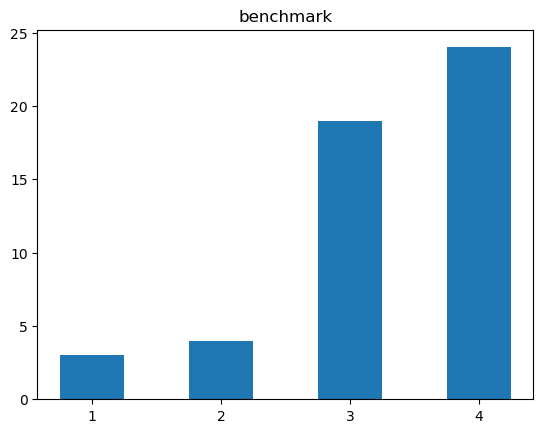

In [ ]:
plt.xticks(range(1,5))
plt.title("Benchmark")
plt.hist(benchmark.Quota,bins=[0.75+0.5*i for i in range(8)])

In [106]:
n = len(benchmark.index)
vendor_acc = (benchmark["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark["Correct Amount"].sum() / n) * 100
date_acc = (benchmark["Correct Invoice Date"].sum() / n) * 100
print(f"Benchmark Vendor Accuracy: {vendor_acc} %")
print(f"Benchmark Invoice Number Accuracy: {number_acc} %")
print(f"Benchmark Amount Accuracy: {amount_acc} %")
print(f"Benchmark Invoice Date Accuracy: {date_acc} %")

Benchmark Vendor Accuracy: 76.0 %
Benchmark Invoice Number Accuracy: 78.0 %
Benchmark Amount Accuracy: 90.0 %
Benchmark Invoice Date Accuracy: 84.0 %


In [107]:
benchmark_pdf = benchmark.loc[scan["Scan"] == False,:]
benchmark_scan = benchmark.loc[scan["Scan"] == True,:]

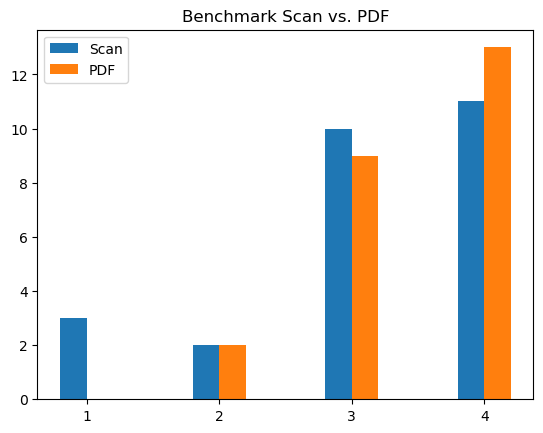

In [108]:
plt.title("Benchmark Scan vs. PDF")
plt.xticks(range(1,5))
plt.hist([benchmark_scan.Quota,benchmark_pdf.Quota],bins=[0.75+0.5*i for i in range(8)])
plt.legend(["Scan","PDF"])
plt.show()

In [111]:
n = benchmark_pdf.shape[0]
vendor_acc = (benchmark_pdf["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark_pdf["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark_pdf["Correct Amount"].sum() / n) * 100
date_acc = (benchmark_pdf["Correct Invoice Date"].sum() / n) * 100
print("PDF Accuracy:")
print(f"Vendor Accuracy: {vendor_acc} %")
print(f"Invoice Number Accuracy: {number_acc} %")
print(f"Amount Accuracy: {amount_acc} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")
n = benchmark_scan.shape[0]
vendor_acc = (benchmark_scan["Correct Vendor"].sum() / n) * 100
number_acc = (benchmark_scan["Correct Invoice Number"].sum() / n) * 100
amount_acc = (benchmark_scan["Correct Amount"].sum() / n) * 100
date_acc = (benchmark_scan["Correct Invoice Date"].sum() / n) * 100
print("Scan Accuracy:")
print(f"Vendor Accuracy: {vendor_acc:.2f} %")
print(f"Invoice Number Accuracy: {number_acc:.2f} %")
print(f"Amount Accuracy: {amount_acc:.2f} %")
print(f"Invoice Date Accuracy: {date_acc:.2f} %")

PDF Accuracy:
Vendor Accuracy: 87.5 %
Invoice Number Accuracy: 87.5 %
Amount Accuracy: 87.5 %
Invoice Date Accuracy: 83.33 %
Scan Accuracy:
Vendor Accuracy: 65.38 %
Invoice Number Accuracy: 69.23 %
Amount Accuracy: 92.31 %
Invoice Date Accuracy: 84.62 %
